In this project, I implemented customer segmentation by combining the RFM (Recency, Frequency, Monetary) method with K-Means clustering. Where each customer was assigned an RFM score, followed by K-Means clustering to identify distinct customer segments. The dataset, comprising three years of retail sales data, served as the foundation for this segmentation.

**Customer Segmentation**

Customer segmentation is a vital strategy for understanding clients better and addressing their diverse needs more effectively.
One of the most effective methods for customer segmentation is RFM analysis. This technique allows businesses to design personalized offers to boost sales and improve customer retention.

**RFM Analysis Overview:**

*   Recency: Number of days since the customer last purchase or order.
*   Frequency: Counts the total number of purchases made by the customer
*   Monetary Value: Reflects the total amount spent by the customer per order.

Assigning customers ratings from 1 to 4, where

Recency 4 being the highest and 1 being lowest

Frequency & Monetary 1 being the highest and 4 being lowest

Final RFM score is obtained by combining these individual scores into a single value, which is then used to classify customers into different RFM categories.

**Dataset**

link:- https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Remove unwanted warnings
import warnings
warnings.filterwarnings('ignore')

# View all features
pd.set_option('display.max_columns',None)

In [2]:
# Load dataset

sales = pd.read_csv('/content/drive/MyDrive/ML - Dataset/Cluster/sales_data_sample.csv', encoding = 'unicode_escape')
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
# Shape of Dataset

row, col = sales.shape
print(f'Dataset has {row} Rows & {col} Columns.')

Dataset has 2823 Rows & 25 Columns.


In [4]:
# Dataset information

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
# Removing irrelevant columns

drop_cols = ['PRODUCTCODE','PHONE','ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','POSTALCODE','COUNTRY','TERRITORY','CONTACTLASTNAME','CONTACTFIRSTNAME','DEALSIZE']

sales = sales.drop(drop_cols, axis=1)
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,Land of Toys Inc.
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,Reims Collectables
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,Lyon Souveniers
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,Toys4GrownUps.com
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,Corporate Gift Ideas Co.


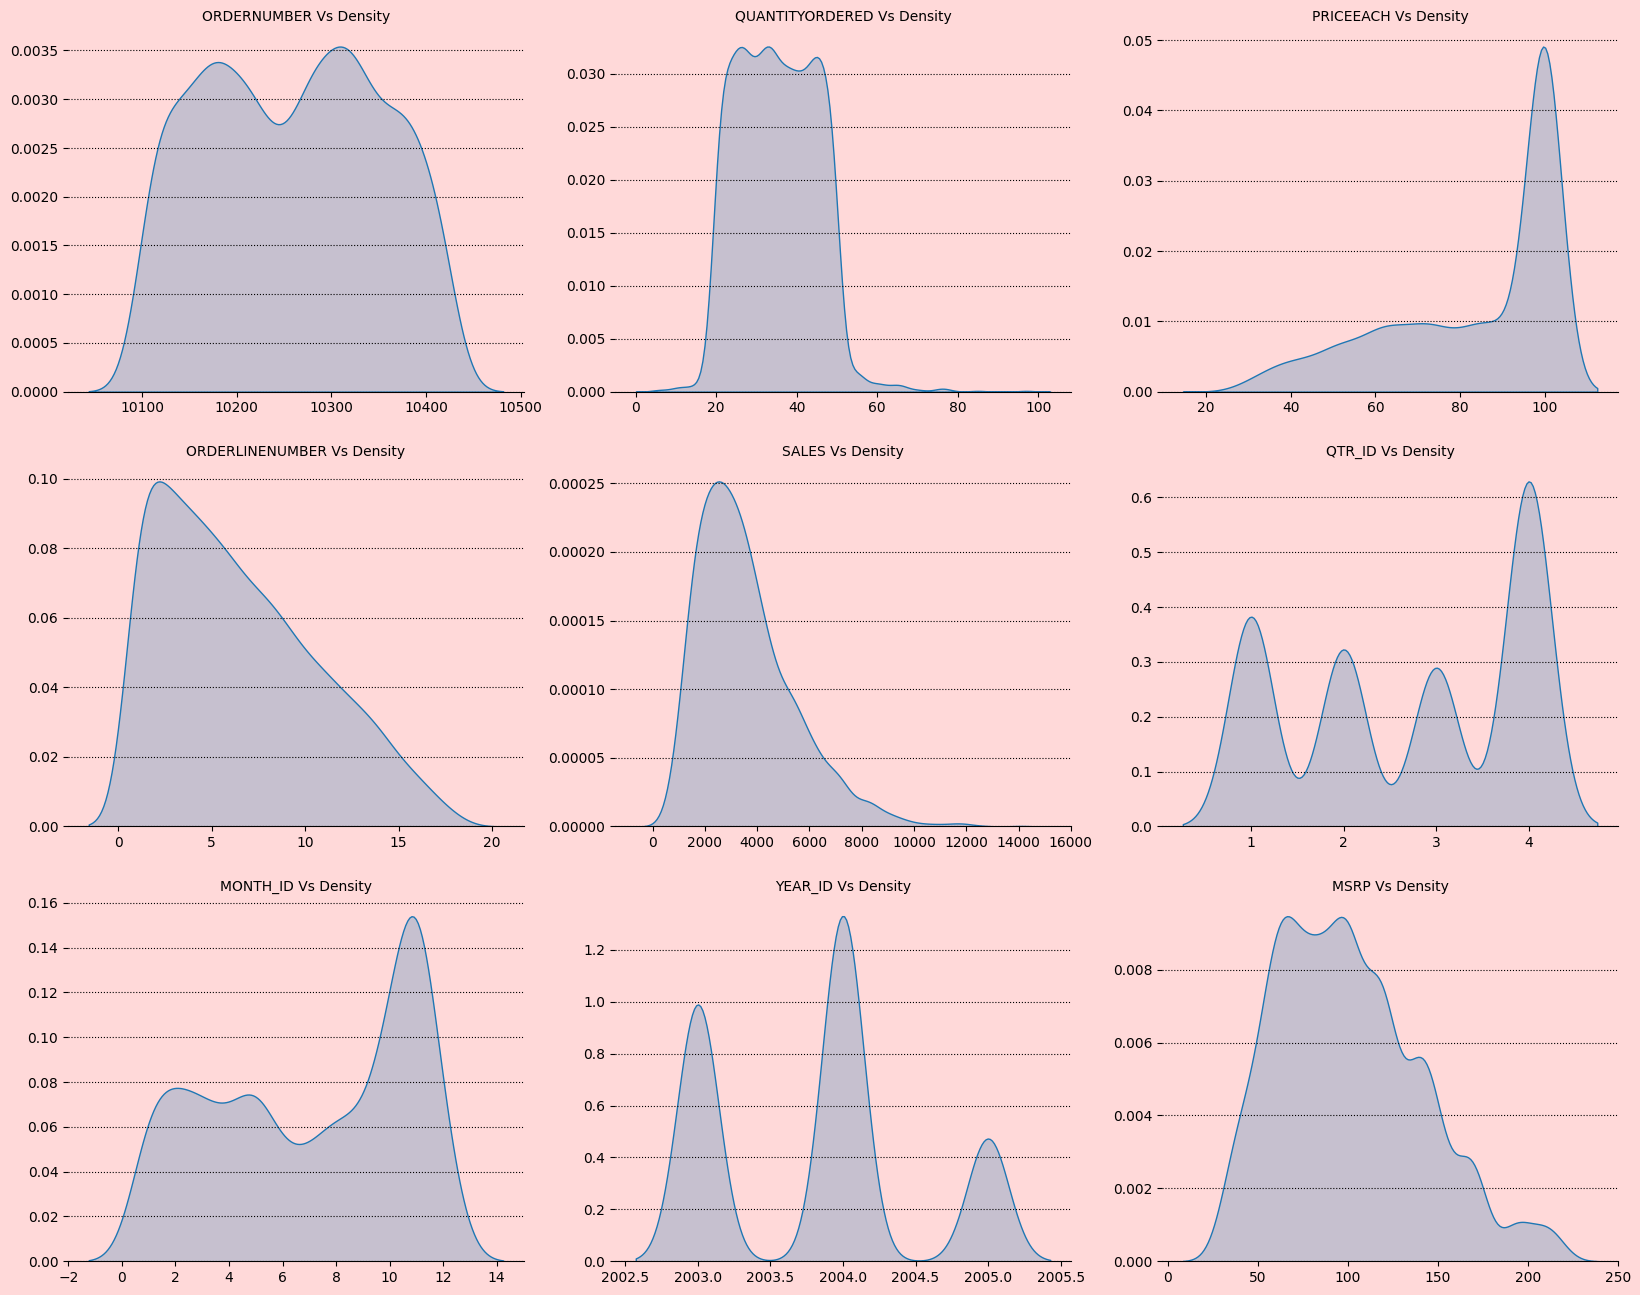

In [6]:
# Distribution of numerical features

num = []
for feature in sales:
  if sales[feature].dtypes != 'O':
    num.append(feature)

# Creating plot structure
fig, axes = plt.subplots(3,3, figsize=(20,16))
axes = axes.ravel()

# Adding color preference
bg_color = '#ffd9d9'
fig.set_facecolor(bg_color)
for i in range(9):
  axes[i].set_facecolor(bg_color)

# Plotting graph
idx = 0
for i in num:
  sns.kdeplot(data=sales, x=num[idx], ax=axes[idx], fill=True)
  axes[idx].set_xlabel('')
  axes[idx].set_ylabel('')
  axes[idx].set_title(num[idx]+ ' Vs Density', size=10)
  axes[idx].grid(axis='y',color='#000000',ls=':')

  for position in ['left', 'right', 'top']:
    axes[idx].spines[position].set_visible(False)

  idx+=1

In [7]:
sales['STATUS'].value_counts()

,count
STATUS,
Shipped,2617
Cancelled,60
Resolved,47
On Hold,44
In Process,41
Disputed,14


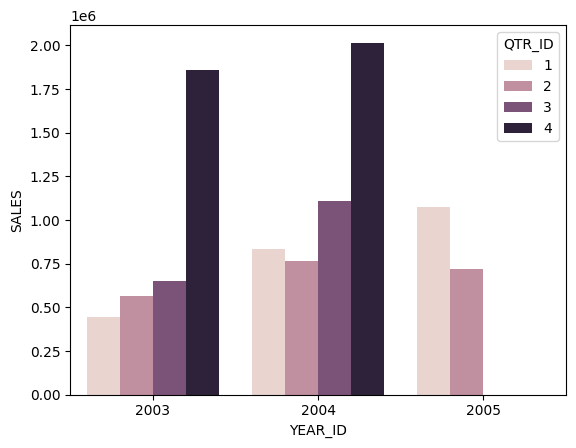

In [8]:
# Total Sales on yearly & quarterly

total_sales = sales.groupby(['YEAR_ID','QTR_ID'])['SALES'].sum()
total_sales = total_sales.reset_index()

fig = sns.barplot(data=total_sales, x='YEAR_ID', y='SALES', hue='QTR_ID')

In [9]:
# Checking missing values

sales.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [10]:
# Checking Duplicates

sales.duplicated().sum()

0

# RFM Approach

In [11]:
# Keeping only relevant features

data = sales[['CUSTOMERNAME','ORDERDATE','ORDERNUMBER','SALES']]
data.head()

,CUSTOMERNAME,ORDERDATE,ORDERNUMBER,SALES
0,Land of Toys Inc.,2/24/2003 0:00,10107,2871.00
1,Reims Collectables,5/7/2003 0:00,10121,2765.90
2,Lyon Souveniers,7/1/2003 0:00,10134,3884.34
3,Toys4GrownUps.com,8/25/2003 0:00,10145,3746.70
4,Corporate Gift Ideas Co.,10/10/2003 0:00,10159,5205.27


In [12]:
# Convert ORDERDATE to DateTime format

data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])

In [ ]:
data.head()

,CUSTOMERNAME,ORDERDATE,ORDERNUMBER,SALES
0,Land of Toys Inc.,2003-02-24,10107,2871.00
1,Reims Collectables,2003-05-07,10121,2765.90
2,Lyon Souveniers,2003-07-01,10134,3884.34
3,Toys4GrownUps.com,2003-08-25,10145,3746.70
4,Corporate Gift Ideas Co.,2003-10-10,10159,5205.27


In [13]:
# Latest purchase date

data['ORDERDATE'].max()

Timestamp('2005-05-31 00:00:00')

In [14]:
# Creating latest date 1 day after max date from dataset

latest = dt.datetime(2005,6,1)
latest

datetime.datetime(2005, 6, 1, 0, 0)

In [15]:
# Groupby on CustomerName

RFMscore = data.groupby('CUSTOMERNAME').agg({'ORDERDATE': lambda x:(latest - x.max()).days,
                                             'ORDERNUMBER': lambda x:x.count(),
                                             'SALES' : lambda x:x.sum()})

# Changing column name
RFMscore.rename(columns={'ORDERDATE':'Recency','ORDERNUMBER':'Frequency','SALES':'Monetory'}, inplace=True)
RFMscore.reset_index()

,CUSTOMERNAME,Recency,Frequency,Monetory
0,"AV Stores, Co.",196,51,157807.81
1,Alpha Cognac,65,20,70488.44
2,Amica Models & Co.,265,26,94117.26
3,"Anna's Decorations, Ltd",84,46,153996.13
4,Atelier graphique,188,7,24179.96
...,...,...,...,...
87,"Vida Sport, Ltd",275,31,117713.56
88,Vitachrome Inc.,208,25,88041.26
89,"Volvo Model Replicas, Co",194,19,75754.88
90,West Coast Collectables Co.,489,13,46084.64


In [16]:
# Split into Quantiles

quantiles = RFMscore.quantile([0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 81.25, 0.5: 186.0, 0.75: 230.25},
 'Frequency': {0.25: 19.75, 0.5: 26.0, 0.75: 32.5},
 'Monetory': {0.25: 70129.4325, 0.5: 86522.61, 0.75: 120575.875}}

In [17]:
# Define functions

def RScore(x, column, quant):
  if x<=quantiles[column][0.25]:
    return 1
  elif x<=quantiles[column][0.50]:
    return 2
  elif x<=quantiles[column][0.75]:
    return 3
  else:
    return 4

def FMScore(x, column, quant):
  if x<=quantiles[column][0.25]:
    return 4
  elif x<=quantiles[column][0.50]:
    return 3
  elif x<=quantiles[column][0.75]:
    return 2
  else:
    return 1

In [18]:
# Assigning ratings based on percentile values

RFMscore['R'] = RFMscore['Recency'].apply(RScore, args=('Recency',quantiles))
RFMscore['F'] = RFMscore['Frequency'].apply(FMScore, args=('Frequency',quantiles))
RFMscore['M'] = RFMscore['Monetory'].apply(FMScore, args=('Monetory',quantiles))

# Adding values
RFMscore['Values'] = RFMscore[['R','F','M']].sum(axis=1)
RFMscore = RFMscore.reset_index()

In [21]:
# Assigning Labels

labels = ['Diamond','Gold','Silver']
RFMscore['Label'] = pd.qcut(RFMscore['Values'], q=3, labels=labels)


# Dropping irrelavant columns
RFMscore.drop(['R','F','M'], axis=1, inplace=True)
RFMscore

In [ ]:
RFMscore.groupby('Label')[['Recency','Frequency','Monetory']].mean()

,Recency,Frequency,Monetory
Label,,,
Diamond,103.757576,49.424242,176707.939697
Gold,170.750000,24.562500,87064.780313
Silver,293.777778,15.037037,52414.587778


# K-Means Cluster Model

In [ ]:
# Creating new dataset
RFM = RFMscore[['R','F','M']]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Using Elbow method to find optimum number of cluster

cluster = []
for i in range(1,15):
  km = KMeans(n_clusters=i)
  km.fit(RFM)
  cluster.append(km.inertia_)

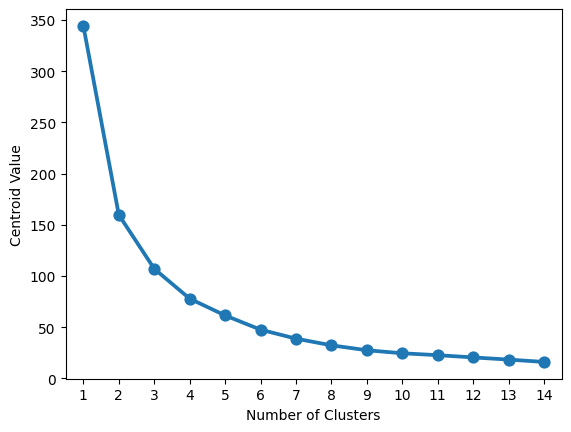

In [ ]:
sns.pointplot(x=list(range(1,15)), y=cluster)
plt.xlabel('Number of Clusters')
plt.ylabel('Centroid Value')
plt.show()

In [ ]:
# Based on Elbow Plot I choose 3 cluster

kmeans = KMeans(n_clusters=3)
kmeans.fit(RFM)
centoid = kmeans.inertia_
labels = kmeans.labels_

In [ ]:
labels

array([1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 1, 0,
       1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 2,
       1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0], dtype=int32)

### Model Evaluation

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(RFM, labels=labels, random_state=42)

0.43795973126819066

In [ ]:
# Merge both DataFrames
final_df = pd.concat([RFMscore, pd.DataFrame(labels, columns=['Group'])], axis=1)

# Dropping irrelavant columns
final_df.drop(['R','F','M','Values'], axis=1, inplace=True)
final_df

,CUSTOMERNAME,Recency,Frequency,Monetory,Group
0,"AV Stores, Co.",196,51,157807.81,1
1,Alpha Cognac,65,20,70488.44,2
2,Amica Models & Co.,265,26,94117.26,0
3,"Anna's Decorations, Ltd",84,46,153996.13,1
4,Atelier graphique,188,7,24179.96,0
...,...,...,...,...,...
87,"Vida Sport, Ltd",275,31,117713.56,0
88,Vitachrome Inc.,208,25,88041.26,0
89,"Volvo Model Replicas, Co",194,19,75754.88,0
90,West Coast Collectables Co.,489,13,46084.64,0
